<a target="_blank" href="https://colab.research.google.com/github/cyneuro/ML_camp/blob/main/camp_logreg_microbit.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Logistic regression with micro:bit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Convert milligravities to m/s2
MG_TO_MS2 = 0.00980665

def process_data(data):
    # Clean the columns
    # orig_columns = ["Time(seconds)", "x", "y", "z"]
    # new_columns = ["t", "ax", "ay", "az"]
    # data = data[new_columns]
    # data.columns = new_columns

    # Clean NaNs
    data = data.dropna()

    # Convert to m/s2
    for acc in ['ax', 'ay', 'az']:
        data[acc] = data[acc] * MG_TO_MS2

    # Replace outliers with the median
    for acc in ['ax', 'ay', 'az']:
        acc_raw = data[acc].copy()
        acc_raw[np.abs(acc_raw / np.median(acc_raw)) > 1.5] = np.median(acc_raw)
        data[acc] = acc_raw

    # Compute velocity
    data['vx'] = cumulative_trapezoid(data['ax'], data['t'], initial = 0)
    data['vy'] = cumulative_trapezoid(data['ay'], data['t'], initial = 0)
    data['vz'] = cumulative_trapezoid(data['az'], data['t'], initial = 0)

    # Compute position
    data['x'] = cumulative_trapezoid(data['vx'], data['t'], initial = 0)
    data['y'] = cumulative_trapezoid(data['vy'], data['t'], initial = 0)
    data['z'] = cumulative_trapezoid(data['vz'], data['t'], initial = 0)

    return data

1. Read and preprocess the dataset.

In [3]:
data = pd.read_csv("accelerometerData.csv", skiprows = 0, sep = ',')
data = process_data(data)
data.head()

,t,ax,ay,az,vx,vy,vz,x,y,z
0,4.45,-0.058840,0.706079,-10.551955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.55,-0.058840,0.706079,-7.335374,-0.005884,0.070608,-0.894366,-0.000294,0.003530,-0.044718
2,4.65,-0.058840,0.706079,-9.257478,-0.011768,0.141216,-1.724009,-0.001177,0.014122,-0.175637
3,4.19,-0.058840,0.823759,-10.512729,0.015298,-0.210647,2.823138,-0.001989,0.030091,-0.428437
4,4.28,-0.039227,0.941438,-10.002783,0.010885,-0.131213,1.899940,-0.000811,0.014707,-0.215898


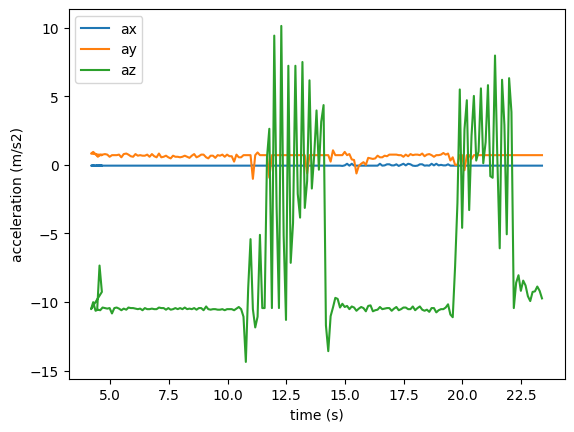

In [4]:
for acc in ['ax', 'ay', 'az']:
    plt.plot(data['t'], data[acc], label = acc)
plt.xlabel("time (s)")
plt.ylabel("acceleration (m/s2)")
plt.legend()

2. Pick a time period of clean data.

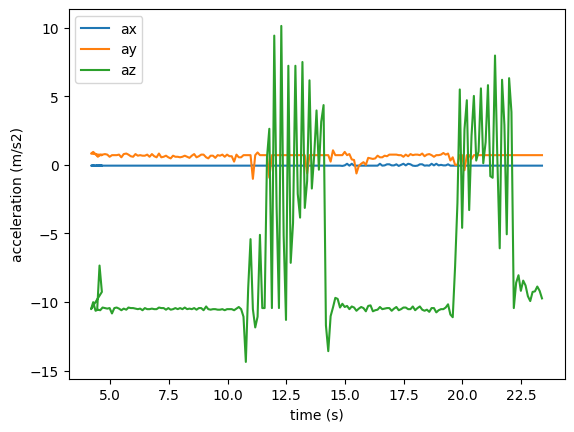

In [5]:
t_start = 0 # seconds
t_end = 25 # seconds

data = data[(data['t'] > t_start) & (data['t'] < t_end)]

for position in ['ax', 'ay', 'az']:
    plt.plot(data['t'], data[position], label = position)
plt.xlabel("time (s)")
plt.ylabel("acceleration (m/s2)")
plt.legend()

3. Split the data into train and test.

In [6]:
X_train = data.loc[data['t'] < 14, ['t', 'ax', 'ay', 'az']]
y_train = np.ones(len(X_train))
y_train[X_train['t'] < 7] = 0

X_test = data.loc[(data['t'] > 14) & (data['t'] < 24), ['t', 'ax', 'ay', 'az']]
y_test = np.ones(len(X_test))
y_test[X_test['t'] < 17] = 0

4. Train a logistic regression model
$$
\hat{p} = \sigma(b_0 + b_1 \times t + b_2 \times a_x + b_3 \times a_y + b_4 \times a_z)
$$

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [8]:
accuracy_score(y_test, preds)

0.6808510638297872

In [9]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])